## 1. Import the backtest system

In [1]:
import backtest as bt

## 2. Load data

按作业要求, 默认路径为`'../data/'`.

In [2]:
path = '../data/'
dataloader = bt.DataLoader(path)

## 3. Create a strategy instance

创建一个抽象策略类并实例化. 这里以`n`日反转策略作为样例, 实例化一个5日反转策略.

可以看到, 在`signal`函数中, 用户可以调用`DataLoader`提供的多种接口, 提供了时序和截面的多样化功能. 比如在这里策略调用时序信息, 使用了`data.timeseries`的一个`property`化的调用函数. 同样地, 我们可以用`data.crosssection`调用截面信息.

In [3]:
class reversal(bt.Strategy):
    def __init__(self, day):
        self.day = day
    
    def signal(self, data):
        time_series_ret = data.timeseries['ret']
        signal = -time_series_ret.rolling(self.day).sum()
        return signal

reversal = reversal(5)

## 4. Build backtest instances

创建回测引擎实例, 读入策略实例, 数据引擎, 并设置交易周期和起止时间. 这里构造两个回测实例进行展示, 一个是按月调仓, 一个是按天调仓. 按天调仓回测调整滑点为`0` (否则完全无法outperform交易成本).

引擎`run`函数返回一个`DataFrame`回测结果, 包括:

1. 起止时间;
2. 频率;
3. 初始仓位;
4. 最终仓位;
5. 年化收益率;
6. benchmark年化收益率;
7. 超额年化收益率;
8. 年化波动率;
9. 夏普比率;
10. 最大回撤;
11. 胜率, 即交易周期内盈利次数占总交易次数比例.

引擎`plot`函数返回图像, 包含策略和benchmark的累计收益率曲线.

注意不同频率的benchmark结果仍然不同，这是因为不同频率的调仓方式导致了持仓方式的不同，而有大量股票存在退市的情况，退市后股票收益率原则上截断, 所以汇总的收益率会有所不同。

Building backtest data...
Calculating ranks...
Calculating weights...
Aggregating results with frequency being <MonthEnd>...
(Note that a high frequency would take a long time...)
Evaluating the backtest result...


,Evaluation
Start Date,2020-07-01
End Date,2022-06-30
Frequency,<MonthEnd>
Initial Position,1000000.0
Ending Position,967869.117653
Annual Return,-0.01621
Benchmark Annual Return,0.025816
Excessive Annual Return,-0.042026
Annual Volatility,0.246228
Sharpe Ratio,-0.065833


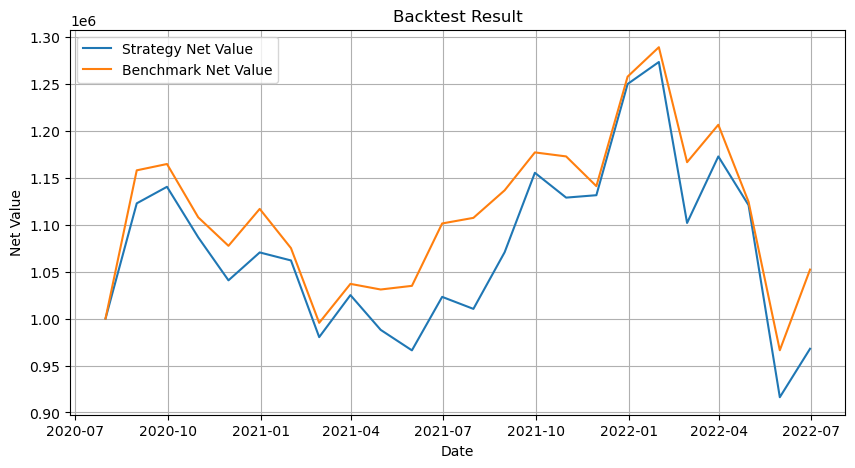

In [4]:
backtest1 = bt.Backtest(
    reversal, dataloader, freq='M',
    start_date='2020-07-01', end_date='2022-06-30'
)
display(backtest1.run())
backtest1.plot()

Building backtest data...
Calculating ranks...
Calculating weights...
Aggregating results with frequency being <Day>...
(Note that a high frequency would take a long time...)
Evaluating the backtest result...


,Evaluation
Start Date,2020-07-01
End Date,2022-06-30
Frequency,<Day>
Initial Position,1000000.0
Ending Position,793353.228411
Annual Return,-0.109225
Benchmark Annual Return,0.114177
Excessive Annual Return,-0.223402
Annual Volatility,0.261879
Sharpe Ratio,-0.417083


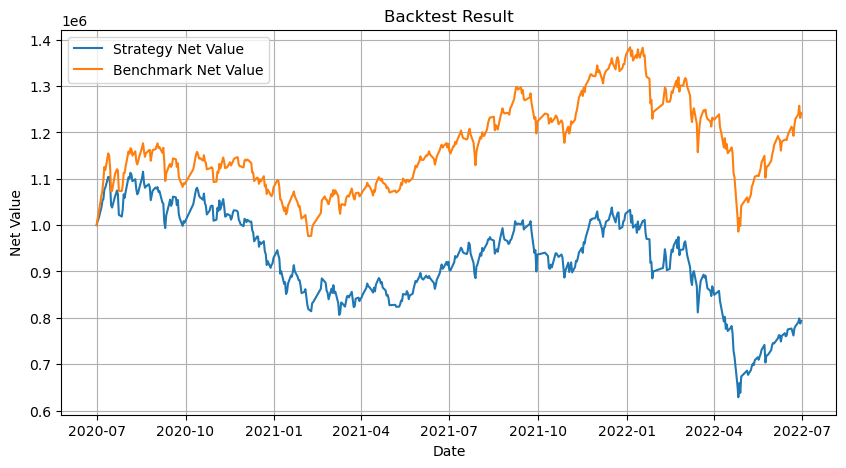

In [5]:
backtest2 = bt.Backtest(
    reversal, dataloader, slippage=0,
    start_date='2020-07-01', end_date='2022-06-30'
)
display(backtest2.run())
backtest2.plot()